In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72583 entries, 0 to 72582
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       72583 non-null  object 
 1   place      72583 non-null  object 
 2   magnitude  72583 non-null  float64
 3   depth_km   72583 non-null  float64
 4   longitude  72583 non-null  float64
 5   latitude   72583 non-null  float64
 6   type       72583 non-null  object 
 7   alert      6427 non-null   object 
 8   tsunami    72583 non-null  int64  
 9   status     72583 non-null  object 
 10  id         72583 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 6.1+ MB


In [1]:
import pandas as pd
df = pd.read_csv("archive.zip")
df.head()

,time,place,magnitude,depth_km,longitude,latitude,type,alert,tsunami,status,id
0,2015-01-01 05:01:10.640,"near the east coast of Honshu, Japan",4.8,41.39,142.0405,38.8957,earthquake,NaN,0,reviewed,",usc000tb3v,"
1,2015-01-01 06:48:29.670,"93 km N of Isangel, Vanuatu",4.6,223.61,169.1795,-18.7052,earthquake,NaN,0,reviewed,",usc000tb42,"
2,2015-01-01 06:54:20.570,central Mid-Atlantic Ridge,4.7,10.00,-31.7641,3.4769,earthquake,NaN,0,reviewed,",usc000tb46,"
3,2015-01-01 07:12:44.230,"120 km SSE of Kirakira, Solomon Islands",4.6,26.24,162.4998,-11.3818,earthquake,NaN,0,reviewed,",usc000tb4a,"
4,2015-01-01 08:49:53.200,"70 km W of F?r?z?b?d, Iran",5.1,10.10,51.8580,28.7280,earthquake,NaN,0,reviewed,",usc000tb4f,iscgem606436879,"


In [3]:
df.isnull().sum()


time             0
place            0
magnitude        0
depth_km         0
longitude        0
latitude         0
type             0
alert        66156
tsunami          0
status           0
id               0
dtype: int64

In [4]:
df.rename(columns={'depth km': 'depth_km'}, inplace=True)


In [5]:
df['type'].value_counts()


type
earthquake           72508
volcanic eruption       71
nuclear explosion        3
mine collapse            1
Name: count, dtype: int64

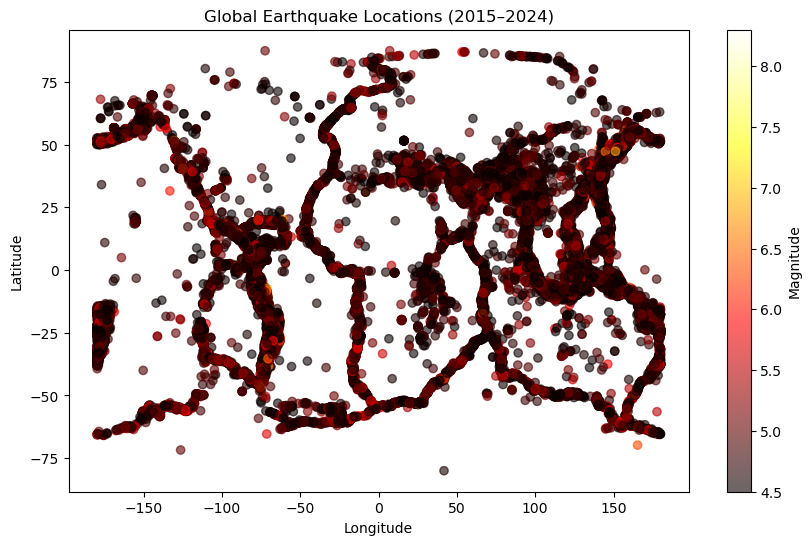

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(df['longitude'], df['latitude'], c=df['magnitude'], cmap='hot', alpha=0.6)
plt.colorbar(label='Magnitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Global Earthquake Locations (2015–2024)')
plt.show()

In [8]:
high_mag_eq = df[df['magnitude'] > 6]

if not high_mag_eq.empty:
    print("Earthquakes with magnitude > 6:")
    print(high_mag_eq[['time', 'place', 'magnitude']].head())
else:
    print("No earthquakes found with magnitude > 6.")


Earthquakes with magnitude > 6:
                        time                                     place  \
109  2015-01-07 05:07:07.510       236 km S of Punta de Burica, Panama   
408  2015-01-23 03:47:27.050           81 km NNE of Port-Vila, Vanuatu   
484  2015-01-28 02:43:19.350                               Fiji region   
592  2015-02-02 10:49:48.530  63 km W of Villa General Roca, Argentina   
739  2015-02-11 18:57:22.460         103 km W of El Aguilar, Argentina   

     magnitude  
109        6.5  
408        6.8  
484        6.2  
592        6.3  
739        6.7  


In [9]:
# Print first 5 rows with even/odd status
for i, val in enumerate(df['tsunami'].head()):
    if pd.notna(val):
        if int(val) % 2 == 0:
            print(f"Row {i}: tsunami = {val} → even")
        else:
            print(f"Row {i}: tsunami = {val} → odd")


Row 0: tsunami = 0 → even
Row 1: tsunami = 0 → even
Row 2: tsunami = 0 → even
Row 3: tsunami = 0 → even
Row 4: tsunami = 0 → even


In [11]:
# Mean of all numeric columns
df.mean(numeric_only=True)

magnitude     4.803389
depth_km     63.121136
longitude    33.304390
latitude     -1.804892
tsunami       0.013832
dtype: float64

In [12]:
# Mode of all columns (returns first mode where multiple modes exist)
df.mode().iloc[0]

time                           2021-02-27 18:59:25.296
place                    South Sandwich Islands region
magnitude                                          4.5
depth_km                                          10.0
longitude                                     -155.281
latitude                                        19.405
type                                        earthquake
alert                                            green
tsunami                                            0.0
status                                        reviewed
id           ,aacse0192fnnf6h,ak0192fnnf6h,us2000jlbk,
Name: 0, dtype: object

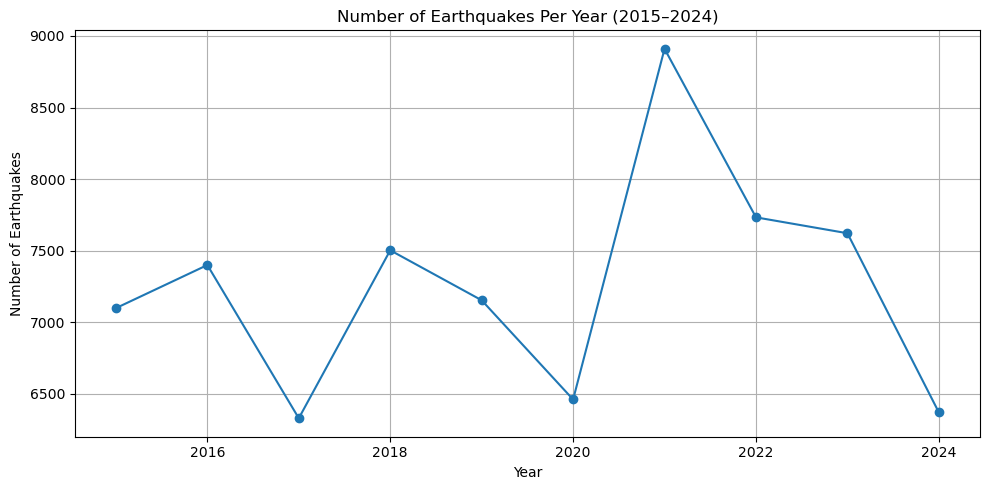

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('archive.zip')

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

df['time'] = pd.to_datetime(df['time'], errors='coerce')

df['year'] = df['time'].dt.year

yearly_counts = df.groupby('year').size()

plt.figure(figsize=(10, 5))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', linestyle='-')
plt.title('Number of Earthquakes Per Year (2015–2024)')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.grid(True)
plt.tight_layout()
plt.show()


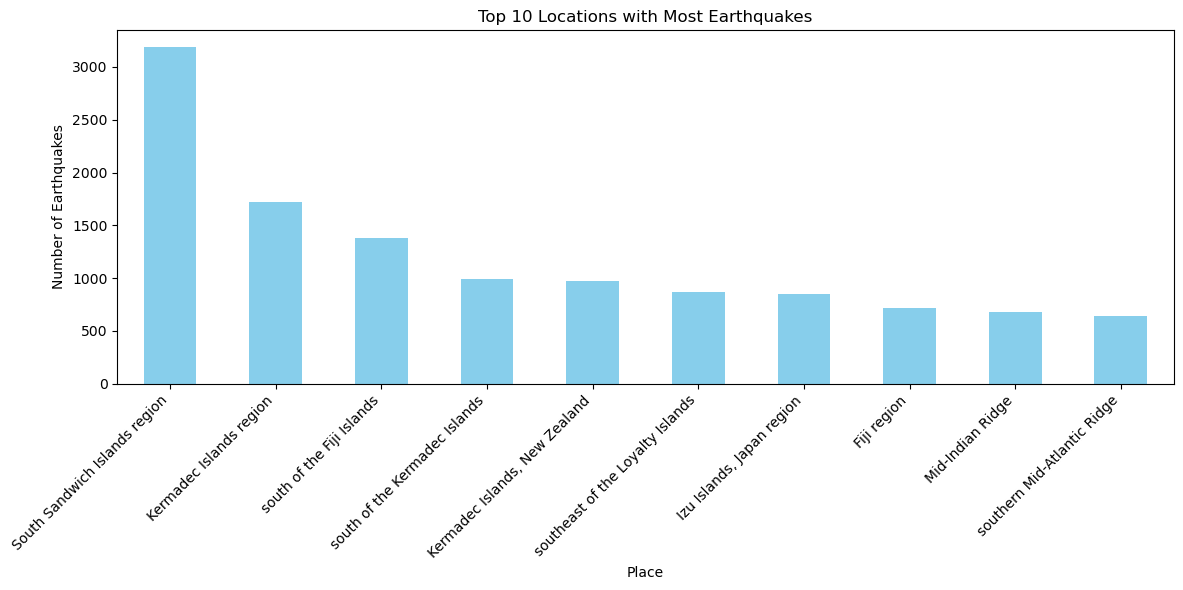

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("archive.zip")
top_places = df['place'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_places.plot(kind='bar', color='skyblue')
plt.title('Top 10 Locations with Most Earthquakes')
plt.xlabel('Place')
plt.ylabel('Number of Earthquakes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

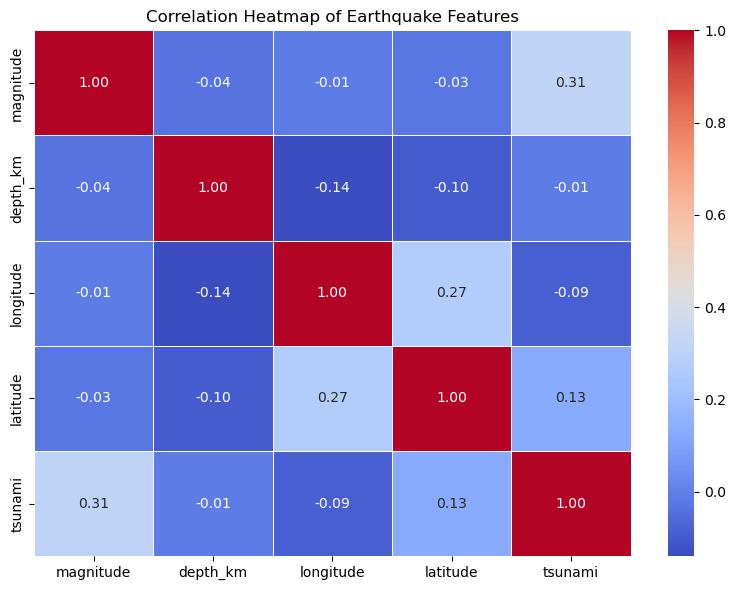

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("archive.zip")


numeric_df = df[['magnitude', 'depth_km', 'longitude', 'latitude', 'tsunami']]


numeric_df = numeric_df.dropna()


corr = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Earthquake Features')
plt.tight_layout()
plt.show()
